## Load tuned model and simulate

In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../")
from spiking_network.models import SpikingModel
from spiking_network.datasets import W0Dataset, GlorotParams

In [4]:
# Load the model
model = SpikingModel.load("../data/saved_models/glorot_20_neurons_0.1_firing_rate.pt")

# Load the dataset
n_neurons = 20
n_datasets = 1
n_steps = 10000
dataset = W0Dataset(n_neurons, n_datasets, GlorotParams())
w0 = dataset[0]

# Run the simulation
X = model.simulate(w0, 10000)

100%|██████████| 10000/10000 [00:01<00:00, 6549.46it/s]


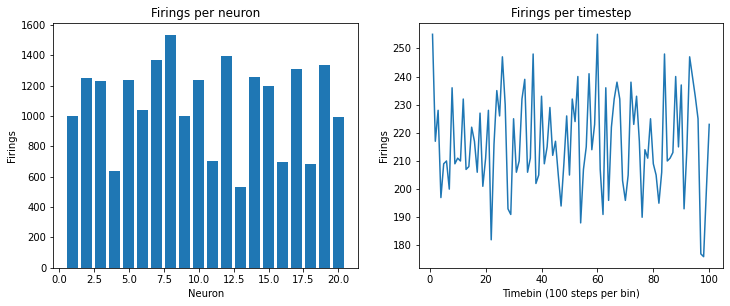

In [5]:
# Visualize the spikes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
fig.set_figheight(4.5)
fig.set_figwidth(12)

axes[0].set_title("Firings per neuron")
axes[0].set_ylabel("Firings")
axes[0].set_xlabel("Neuron")
axes[0].bar(range(1, n_neurons + 1), torch.sum(X, axis=1), lw=0)

axes[1].set_title("Firings per timestep")
axes[1].set_ylabel("Firings")
axes[1].set_xlabel(f"Timebin ({n_steps // 100} steps per bin)")
axes[1].plot(range(1, 101), torch.sum(X, axis=0).reshape(100, -1).sum(axis=0))

In [6]:
# Print the firing rate
print(f"Firing rate: {torch.sum(X) / (n_neurons * n_steps)}")

Firing rate: 0.10831999778747559
